# Apply the Frequency Domain Activity Correction to the Kecks HD 3651 data

In [1]:
from fdac import fdac

D:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
D:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as ex
from finufft import nufft1d3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy.stats import trim_mean, chi2
from math import ceil

plt.rcParams.update({"font.size" : 14})
plt.rcParams.update({"axes.labelsize" : 14})

## Load the data

In [4]:
data = pd.read_csv("data/HD3651.tsv", sep = '\t', skiprows = 46)
data.columns = ['Target', 'BJD', 'RV (m/s)', 'e_RV (m/s)', 'S', 'H', 'Count', 'Exp', 'Ndata']
data.head()

,Target,BJD,RV (m/s),e_RV (m/s),S,H,Count,Exp,Ndata
0,HD3651,2.450367e+06,-3.61,1.23,0.1705,-1.0,255941,100,161
1,HD3651,2.450667e+06,6.43,1.23,0.1809,-1.0,175312,90,161
2,HD3651,2.450716e+06,4.05,1.32,0.1633,-1.0,125033,60,161
3,HD3651,2.451044e+06,-2.19,1.40,0.1739,-1.0,112840,35,161
4,HD3651,2.451071e+06,-3.31,1.48,0.1706,-1.0,134556,40,161


Text(0.5, 1.0, 'RV Measuremenst for HD 3651')

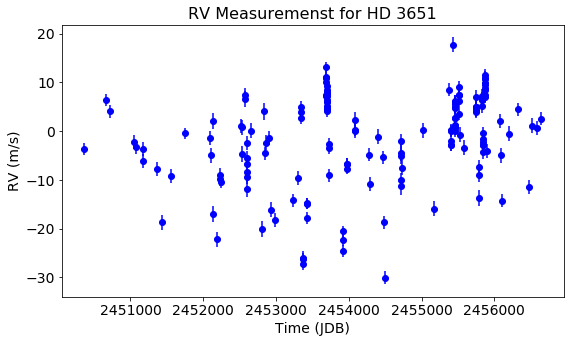

In [5]:
#plot the RV
plt.figure(figsize=(9,5))
plt.errorbar(data['BJD'], data['RV (m/s)'], yerr = data['e_RV (m/s)'], fmt = 'o', color = 'b')
plt.ylabel('RV (m/s)')
plt.xlabel('Time (JDB)')
plt.title('RV Measuremenst for HD 3651', fontsize = 16)

Text(0.5, 1.0, 'Photometry')

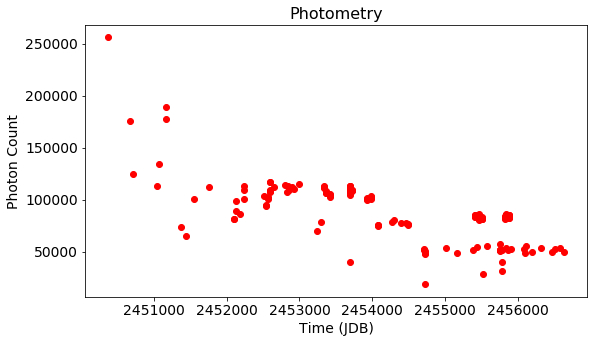

In [6]:
#plot the photometry
plt.figure(figsize=(9,5))
plt.errorbar(data['BJD'], data['Count'], fmt = 'o', color = 'r')
plt.ylabel('Photon Count')
plt.xlabel('Time (JDB)')
plt.title('Photometry', fontsize = 16)

In [7]:
#check if any of the columns have nan values
data.isnull().values.any()

False

## Apply the acitivy correction module 

In [8]:
#try first without the photometry
time =  data['BJD']
obs = np.array([data['RV (m/s)'], data['S'], data['H']])
names = ['RV', 'S index', 'H index']
fdac_hd3651 = fdac(time, obs, names)

Mean Nyquist frequency:  0.012751199486606616 

Median Nyquist frequency:  0.5031395911746229 

10% trimmed Mean Nyquist frequency:  0.01801840882270474 

20% trimmed mean Nyqusit frequenct:  0.02565999110906003 



Number of Rayleigh resolution units: 161
Maximum frequency (cycles/day): 0.0255
Rayleigh resolution: 0.0002


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


IndexError: list index out of range

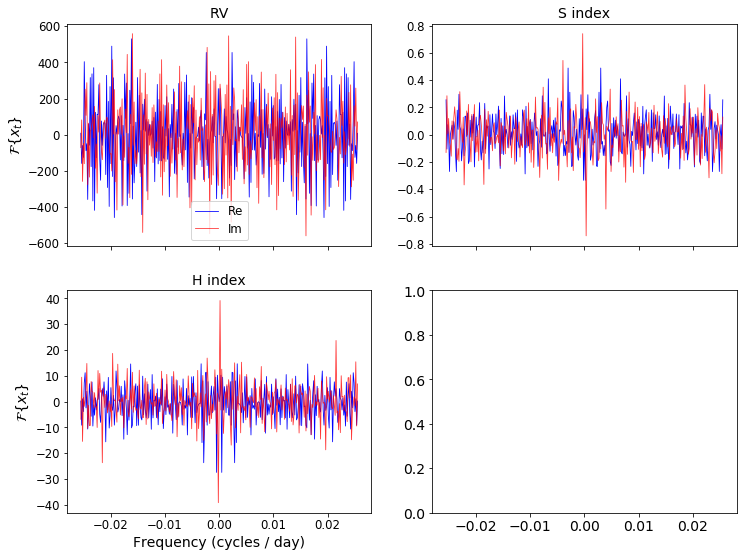

In [9]:
fdac_hd3651.frequency_grid(fdac_hd3651.Nyq_meandt) #try mean dt
fdac_hd3651.computeNFFT()
fdac_hd3651.plotNFFT()

Real
----
Intercept: 
 -2.7482196436579747
Coefficients: 
 [-1.24543531e+01 -1.71506542e-08  1.13828067e+02 -3.07231263e-08]

Imaginary
---------
Intercept: 
 -6.199778070214474e-09
Coefficients: 
 [ 3.27312767e-08 -1.88010872e+01 -1.07028733e-08  1.20845190e+02]


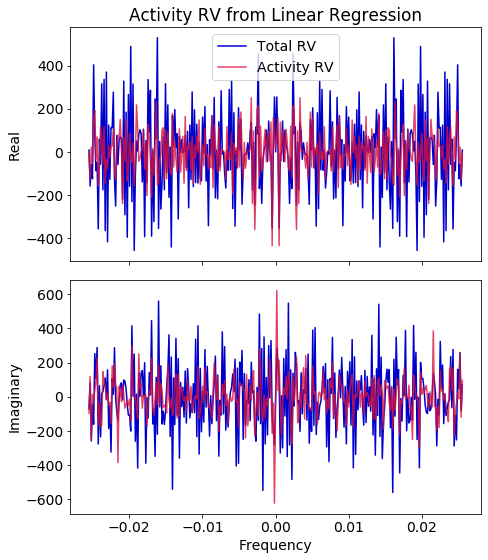

In [10]:
fdac_hd3651.linear_reg()
fdac_hd3651.fftac_plot()

143.432247515143 1.0122113242667912e-07
Raw standard deviation 9.3763
Variance ratio: 0.3267
Should be 1: 1.0
Should be equal: 5.3594 5.3594
Std dev of clean RV: 7.975018513369646


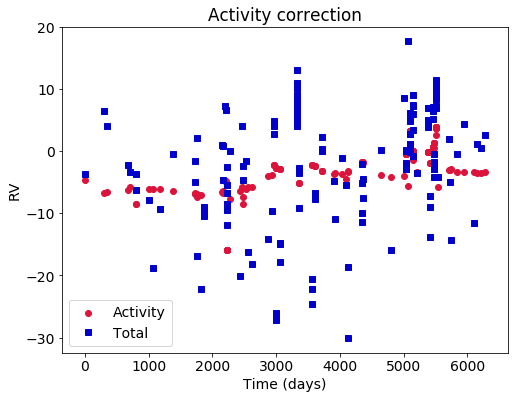

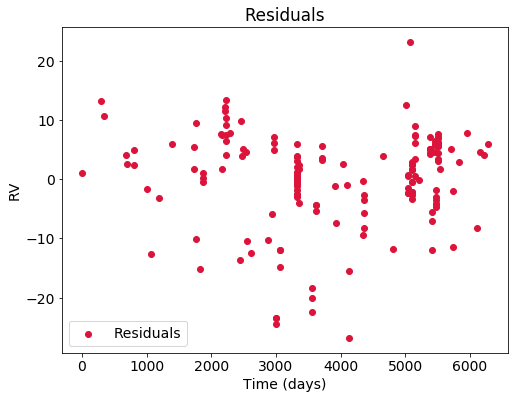

In [11]:
fdac_hd3651.inverfft()
fdac_hd3651.activityplot(clean = True)

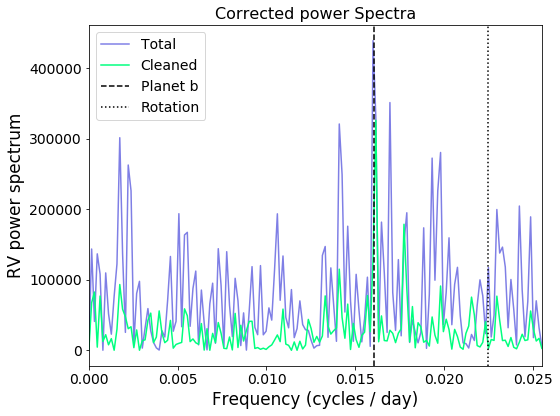

In [17]:
planet_b = 1/62.25
rotation = 1/44.5
fdac_hd3651.residual_powplot()
plt.axvline(planet_b, linestyle = '--', color = 'k', label = 'Planet b')
plt.axvline(rotation, linestyle = ':', color = 'k', label = 'Rotation')
plt.legend()

### Try including the Photometry

In [22]:
obs_photo = np.array([data['RV (m/s)'], data['S'], data['H'], data['Count']])
names_photo = ['RV', 'S index', 'H index', 'Flux']
fdac_photo = fdac(time, obs_photo, names_photo)

Mean Nyquist frequency:  0.012751199486606616 

Median Nyquist frequency:  0.5031395911746229 

10% trimmed Mean Nyquist frequency:  0.01801840882270474 

20% trimmed mean Nyqusit frequenct:  0.02565999110906003 



Number of Rayleigh resolution units: 161
Maximum frequency (cycles/day): 0.0255
Rayleigh resolution: 0.0002


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


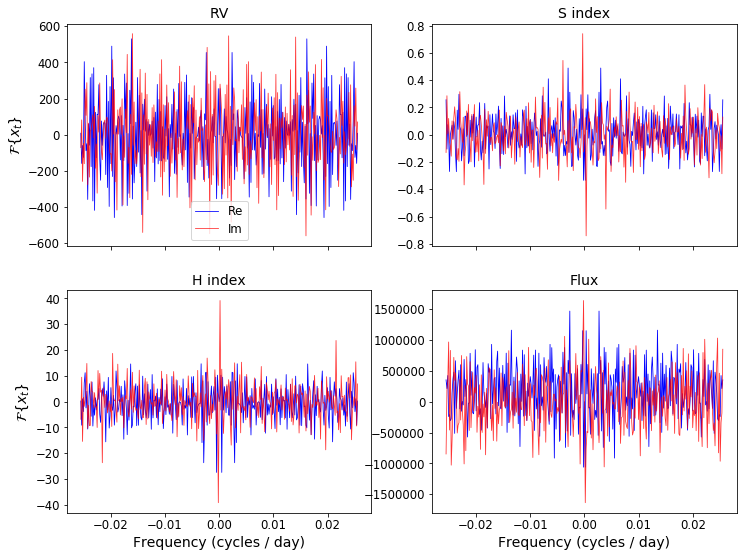

In [23]:
fdac_photo.frequency_grid(fdac_photo.Nyq_meandt)
fdac_photo.computeNFFT()
fdac_photo.plotNFFT()

Real
----
Intercept: 
 -2.74821964365797
Coefficients: 
 [-2.95854600e+01 -4.41110615e-09  1.18178243e+02  2.82589000e-08
  8.25466018e+01  6.22699890e-08]

Imaginary
---------
Intercept: 
 -6.1997785789380715e-09
Coefficients: 
 [-3.02339563e-08 -4.33722383e+01 -5.61456233e-08  1.43775300e+02
  9.00767638e-08  6.98588203e+01]


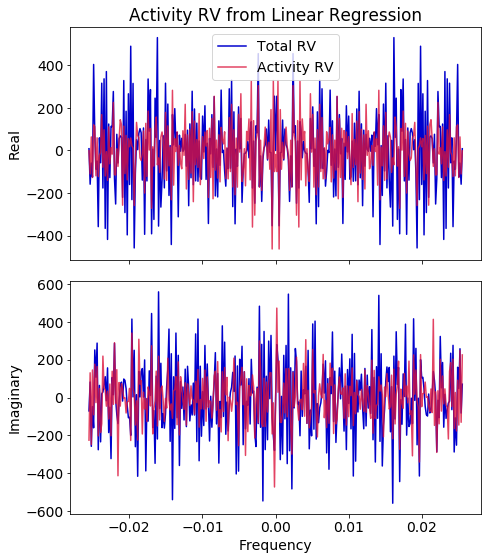

In [24]:
fdac_photo.linear_reg()
fdac_photo.fftac_plot()

264.0580719013675 9.600031291099061e-08
Raw standard deviation 9.3763
Variance ratio: 0.4545
Should be 1: 0.9999999999999998
Should be equal: 6.3210 6.3210
Std dev of clean RV: 8.287534608862995


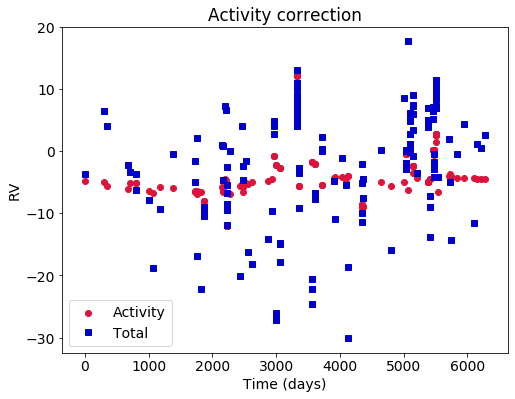

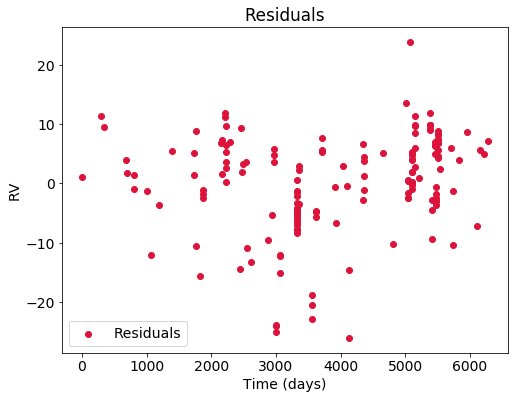

In [25]:
fdac_photo.inverfft()
fdac_photo.activityplot(clean = True)

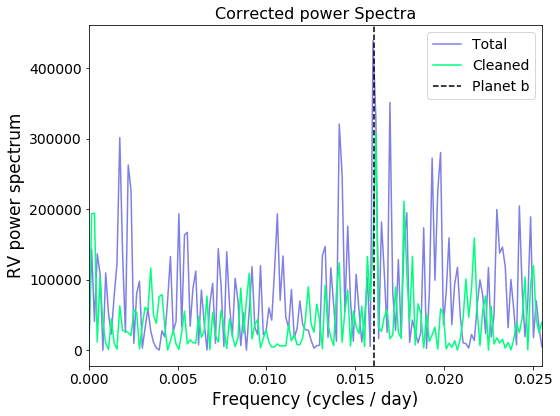

In [30]:
planet_b = 1/62.25
fdac_photo.residual_powplot()
plt.axvline(planet_b, linestyle = '--', color = 'k', label = 'Planet b')
plt.legend()